In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder , StandardScaler 
from sklearn.compose import ColumnTransformer

from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.model_selection import train_test_split


from sklearn.metrics import plot_confusion_matrix, confusion_matrix, plot_confusion_matrix,\
    precision_score, recall_score, accuracy_score, f1_score, log_loss,\
    roc_curve, roc_auc_score, ConfusionMatrixDisplay, classification_report

In [77]:
df = pd.read_csv("merged_train_df.csv", low_memory = False)
df.drop("Unnamed: 0", inplace=True, axis=1)
df["Respondent ZCTA"]= df["Respondent ZCTA"].astype(str)

In [78]:
df.columns

Index(['Hearing Result', 'Issuing Agency', 'Violation Location (Borough)',
       'Respondent Address (Borough)', 'Decision Location (Borough)',
       'Charge #1: Code Section', 'weekend_indi', 'Season',
       'Respondent Status', 'Respondent ZCTA',
       'Estimate!!Nonfamily households!!Median income (dollars)',
       'Estimate!!Nonfamily households!!Mean income (dollars)',
       'Estimate!!Nonfamily households!!Total!!Less than $10,000',
       'Estimate!!Nonfamily households!!Total!!$10,000 to $14,999',
       'Estimate!!Nonfamily households!!Total!!$15,000 to $24,999',
       'Estimate!!Nonfamily households!!Total!!$25,000 to $34,999',
       'Estimate!!Nonfamily households!!Total!!$35,000 to $49,999',
       'Estimate!!Nonfamily households!!Total!!$50,000 to $74,999',
       'Estimate!!Households!!Median income (dollars)',
       'Estimate!!Households!!Mean income (dollars)',
       'Estimate!!Households!!Total!!Less than $10,000',
       'Estimate!!Households!!Total!!$10,000

In [79]:
list_to_convert = ['Estimate!!Nonfamily households!!Median income (dollars)',
       'Estimate!!Nonfamily households!!Mean income (dollars)',
       'Estimate!!Nonfamily households!!Total!!Less than $10,000',
       'Estimate!!Nonfamily households!!Total!!$10,000 to $14,999',
       'Estimate!!Nonfamily households!!Total!!$15,000 to $24,999',
       'Estimate!!Nonfamily households!!Total!!$25,000 to $34,999',
       'Estimate!!Nonfamily households!!Total!!$35,000 to $49,999',
       'Estimate!!Nonfamily households!!Total!!$50,000 to $74,999',
       'Estimate!!Households!!Median income (dollars)',
       'Estimate!!Households!!Mean income (dollars)',
       'Estimate!!Households!!Total!!Less than $10,000',
       'Estimate!!Households!!Total!!$10,000 to $14,999',
       'Estimate!!Households!!Total!!$15,000 to $24,999',
       'Estimate!!Households!!Total!!$25,000 to $34,999',
       'Estimate!!Households!!Total!!$35,000 to $49,999',
       'Estimate!!Households!!Total!!$50,000 to $74,999']

In [80]:
def fill_na(column):
    for x in column:
        df[x].fillna(0, inplace=True)
    
    return df.head(2)

In [81]:
fill_na(list_to_convert)

,Hearing Result,Issuing Agency,Violation Location (Borough),Respondent Address (Borough),Decision Location (Borough),Charge #1: Code Section,weekend_indi,Season,Respondent Status,Respondent ZCTA,...,"Estimate!!Nonfamily households!!Total!!$35,000 to $49,999","Estimate!!Nonfamily households!!Total!!$50,000 to $74,999",Estimate!!Households!!Median income (dollars),Estimate!!Households!!Mean income (dollars),"Estimate!!Households!!Total!!Less than $10,000","Estimate!!Households!!Total!!$10,000 to $14,999","Estimate!!Households!!Total!!$15,000 to $24,999","Estimate!!Households!!Total!!$25,000 to $34,999","Estimate!!Households!!Total!!$35,000 to $49,999","Estimate!!Households!!Total!!$50,000 to $74,999"
0,0.0,SANITATION POLICE,QUEENS,QUEENS,In Person QUEENS,AC 16,0.0,Spring,Person,11372.0,...,14.5,19.3,60659.0,79621.0,4.3,4.5,10.2,9.6,14.7,19.0
1,0.0,POLICE DEPARTMENT,MANHATTAN,QUEENS,UNKNOWN,AC 17,1.0,Winter,Person,11372.0,...,14.5,19.3,60659.0,79621.0,4.3,4.5,10.2,9.6,14.7,19.0


In [82]:
x_train = df.drop("Hearing Result", axis=1)
y_train = df["Hearing Result"]

In [83]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213243 entries, 0 to 213242
Data columns (total 25 columns):
 #   Column                                                     Non-Null Count   Dtype  
---  ------                                                     --------------   -----  
 0   Issuing Agency                                             213243 non-null  object 
 1   Violation Location (Borough)                               213243 non-null  object 
 2   Respondent Address (Borough)                               213243 non-null  object 
 3   Decision Location (Borough)                                213243 non-null  object 
 4   Charge #1: Code Section                                    213243 non-null  object 
 5   weekend_indi                                               213243 non-null  float64
 6   Season                                                     213243 non-null  object 
 7   Respondent Status                                          213243 non-null  object 

In [84]:
# Creating dummies
# Create the OneHotEncoder object

ohe = OneHotEncoder(drop='first')


# Transform the data into dummies

trans = ohe.fit_transform(x_train[['Issuing Agency',
                                   "Respondent Address (Borough)",
                                   "Violation Location (Borough)", 
                                   "Decision Location (Borough)",
                                  "Charge #1: Code Section",
                                  "Season","Respondent Status","Respondent ZCTA"]])


# Store the dummies matrix and name vector

data = trans.todense()
names = ohe.get_feature_names()


# Put the dummy variables in a dataframe

dummies = pd.DataFrame(data, columns=names)


# Join the dummies dataframe to the original

x_train = df.join(dummies)

In [85]:
x_train = x_train.drop(["Hearing Result", 
                        'Issuing Agency',
                        "Respondent Address (Borough)",
                        "Violation Location (Borough)", 
                        "Decision Location (Borough)",
                       "Charge #1: Code Section",
                        "Season",
                        "Respondent Status",
                        "Respondent ZCTA"], axis=1)

In [86]:
x_train.sample(5)

,weekend_indi,Estimate!!Nonfamily households!!Median income (dollars),Estimate!!Nonfamily households!!Mean income (dollars),"Estimate!!Nonfamily households!!Total!!Less than $10,000","Estimate!!Nonfamily households!!Total!!$10,000 to $14,999","Estimate!!Nonfamily households!!Total!!$15,000 to $24,999","Estimate!!Nonfamily households!!Total!!$25,000 to $34,999","Estimate!!Nonfamily households!!Total!!$35,000 to $49,999","Estimate!!Nonfamily households!!Total!!$50,000 to $74,999",Estimate!!Households!!Median income (dollars),...,x7_11433.0,x7_11434.0,x7_11435.0,x7_11436.0,x7_11691.0,x7_11692.0,x7_11693.0,x7_11694.0,x7_11697.0,x7_nan
128292,1.0,22684.0,36710.0,24.1,14.1,16.2,7.0,11.7,14.2,37804.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
211628,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
141867,0.0,59564.0,79953.0,11.8,8.2,10.6,5.9,8.1,14.4,67795.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102034,0.0,21268.0,38123.0,30.7,10.4,12.5,10.6,9.0,11.4,39382.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
166537,0.0,39507.0,50218.0,9.9,10.2,14.4,9.0,14.1,25.1,63706.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


categorical_columns = ['Issuing Agency', 'Violation Location (Borough)',
       'Violation Location (City)', 'Respondent Address (Borough)',
       'Respondent Address (City)', 'Decision Location (Borough)','Respondent Status']

#'Respondent Address (Zip Code)'
#'Violation Location (Zip Code)'
#'Charge #1: Code Description'
ohe_col_trans = ColumnTransformer(transformers=
                                  [('ohe', OneHotEncoder(drop='first', sparse=True), 
                                    categorical_columns)],
                                  remainder='passthrough')


transform_pipeline = Pipeline(steps=[('ohe_trans', ohe_col_trans)])


x_train_transformed = transform_pipeline.fit_transform(x_train)

In [87]:
def print_cv_scores(pipe, X, y):
    '''
    Runs cross_validate on given feature and multiclass target arrays using given pipeline, 
    printing the scoring results for both training and cross_val.
    '''
    scoring = ['accuracy','precision_macro', 'recall_macro', 'f1_macro']
    
    results = cross_validate(pipe, X, 
                                   y, 
                                   return_train_score=True, scoring=scoring)
    
    print(results['train_accuracy'])
    print('Training Accuracy', results['train_accuracy'].mean())
    print('##############')
    print(results['test_accuracy'])
    print('Cross_Val Accuracy', results['test_accuracy'].mean())
    print('##############')
    print('Training Macro Precision:', results['train_precision_macro'].mean())
    print('Cross_Val Macro Precision:', results['test_precision_macro'].mean())
    print('##############')
    print('Training Macro Recall:', results['train_recall_macro'].mean())
    print('Cross_Val Macro Recall:', results['test_recall_macro'].mean())
    print('##############')
    print('Training Macro F1:', results['train_f1_macro'].mean())
    print('Cross_Val Macro F1:', results['test_f1_macro'].mean())

In [88]:
display_labels = ['No Fee Collected', 
                  'Fee Collected']

def print_cm_with_labels(y_true, 
                         y_pred, 
                         display_labels):
    
    
    '''
    Takes the true values and predicted values of a classifier and 
    plots a confusion matrix (normalized by predictions) using 
    a list of given display labels.
    '''
    cm = confusion_matrix(y_true, y_pred, normalize = 'pred')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  )

    fig, ax = plt.subplots(figsize=(6,6))
    disp.plot(ax=ax)
    ax.grid(False)
    disp.ax_.set_xticklabels(display_labels,rotation=45);

# FSM

In [89]:
dummy_model = DummyClassifier(strategy="most_frequent")
dummy_model.fit(x_train, y_train)
y_hat = dummy_model.predict(x_train)

In [90]:
acc = accuracy_score(y_train,y_hat)
macro_precision_score=precision_score(y_train, y_hat, average='macro')
micro_precision_score=precision_score(y_train, y_hat, average='micro')
macro_recall_score=recall_score(y_train, y_hat, average='macro')
micro_recall_score=recall_score(y_train, y_hat, average='micro')

print('Accuracy Score: {}'.format(acc))
print('Macro Precision Score: {}'.format(macro_precision_score))
print('Micro Precision Score: {}'.format(micro_precision_score))
print('Macro Recall Score: {}'.format(macro_recall_score))
print('Micro Recall Score: {}'.format(micro_recall_score))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy Score: 0.6040151376598528
Macro Precision Score: 0.3020075688299264
Micro Precision Score: 0.6040151376598528
Macro Recall Score: 0.5
Micro Recall Score: 0.6040151376598528


In [91]:
print_cv_scores(dummy_model, x_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

[0.60401304 0.60401304 0.6040189  0.60401536 0.60401536]
Training Accuracy 0.6040151376593361
##############
[0.60402354 0.60402354 0.60400009 0.60401426 0.60401426]
Cross_Val Accuracy 0.6040151376515861
##############
Training Macro Precision: 0.30200756882966806
Cross_Val Macro Precision: 0.30200756882579305
##############
Training Macro Recall: 0.5
Cross_Val Macro Recall: 0.5
##############
Training Macro F1: 0.37656448712756774
Cross_Val Macro F1: 0.3765644871077857


# Logistic Regression

In [92]:
lr_pipe = Pipeline(steps=[
    ('ss', StandardScaler()),
    ('lr', LogisticRegression(random_state=42, max_iter=100000))
])
lr_pipe.fit(x_train, y_train)

Pipeline(steps=[('ss', StandardScaler()),
                ('lr', LogisticRegression(max_iter=100000, random_state=42))])

In [93]:
print_cv_scores(lr_pipe, x_train, y_train)

[0.68797261 0.69187076 0.68844156 0.68422287 0.68296843]
Training Accuracy 0.6870952469708185
##############
[0.55832493 0.48427865 0.54861779 0.56075314 0.66697149]
Cross_Val Accuracy 0.5637891989243805
##############
Training Macro Precision: 0.6720443625408858
Cross_Val Macro Precision: 0.5649142542023424
##############
Training Macro Recall: 0.6562778440710144
Cross_Val Macro Recall: 0.5576962064325856
##############
Training Macro F1: 0.6593952670072267
Cross_Val Macro F1: 0.5388150985134099


In [ ]:
display_labels=display_labels

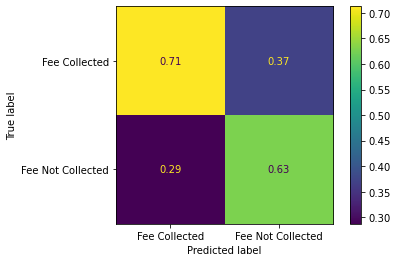

In [94]:
plot_confusion_matrix(lr_pipe, x_train, y_train, 
                      display_labels= ['Fee Collected', 'Fee Not Collected'], normalize="pred");

In [330]:
importance = lr.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
    plt.bar([x for x in range(len(importance))], importance)
    plt.show()

NameError: name 'lr' is not defined

# Decision Tree

In [95]:
dt_pipe = Pipeline(steps=[
    ('ss', StandardScaler()),
    ('lr', DecisionTreeClassifier())
])
dt_pipe.fit(x_train, y_train)

Pipeline(steps=[('ss', StandardScaler()), ('lr', DecisionTreeClassifier())])

In [96]:
print_cv_scores(dt_pipe, x_train, y_train)

[0.76130462 0.76685581 0.76012638 0.75163399 0.7450277 ]
Training Accuracy 0.7569896987447576
##############
[0.63574761 0.57818472 0.63391873 0.60591352 0.6266179 ]
Cross_Val Accuracy 0.6160764966654317
##############
Training Macro Precision: 0.7507208224639144
Cross_Val Macro Precision: 0.6019864521020393
##############
Training Macro Recall: 0.7314757661521043
Cross_Val Macro Recall: 0.5940113577026489
##############
Training Macro F1: 0.737094961380612
Cross_Val Macro F1: 0.5895460534688516


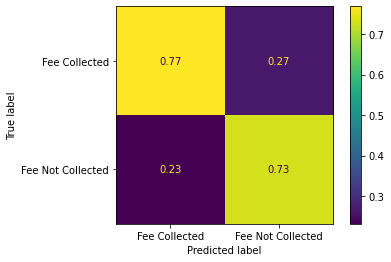

In [97]:
plot_confusion_matrix(dt_pipe, x_train, y_train, 
                      display_labels= ['Fee Collected', 'Fee Not Collected'], normalize="pred");

In [98]:
testing = pd.DataFrame(dt_pipe.steps[1][1].feature_importances_)

In [99]:
testing.sort_values(by = 0, ascending = False)

,0
17,0.159435
50,0.125056
11,0.056834
0,0.037896
38,0.036533
...,...
48,0.000000
47,0.000000
42,0.000000
40,0.000000


In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=2) 

tree_clf.fit(x_train_transformed, y_train)

y_hat = tree_clf.predict(x_train_transformed)

acc = accuracy_score(y_train,y_hat)
macro_precision_score=precision_score(y_train, y_hat, average='macro')
micro_precision_score=precision_score(y_train, y_hat, average='micro')
macro_recall_score=recall_score(y_train, y_hat, average='macro')
micro_recall_score=recall_score(y_train, y_hat, average='micro')


print('Accuracy Score: {}'.format(acc))
print('Macro Precision Score: {}'.format(macro_precision_score))
print('Micro Precision Score: {}'.format(micro_precision_score))
print('Macro Recall Score: {}'.format(macro_recall_score))
print('Micro Recall Score: {}'.format(micro_recall_score))

In [ ]:
print_cv_scores(tree_clf, x_train_transformed, y_train)

In [ ]:
print_cm_with_labels(x_train_transformed, y_hat, display_labels)

# Random Forest

In [100]:
rf_pipe = Pipeline(steps=[
    ('ss', StandardScaler()),
    ('rf', RandomForestClassifier(class_weight="balanced"))
])
rf_pipe.fit(x_train, y_train)

Pipeline(steps=[('ss', StandardScaler()),
                ('rf', RandomForestClassifier(class_weight='balanced'))])

In [101]:
print_cv_scores(rf_pipe, x_train, y_train)

[0.74608134 0.75479794 0.74549515 0.7350743  0.72844456]
Training Accuracy 0.7419786586645949
##############
[0.64432929 0.60650895 0.63389528 0.6317764  0.66164885]
Cross_Val Accuracy 0.6356317542040777
##############
Training Macro Precision: 0.7409189526513871
Cross_Val Macro Precision: 0.6366146395521488
##############
Training Macro Recall: 0.7517285428024436
Cross_Val Macro Recall: 0.6400757441080169
##############
Training Macro F1: 0.7388436428533874
Cross_Val Macro F1: 0.629192288460086


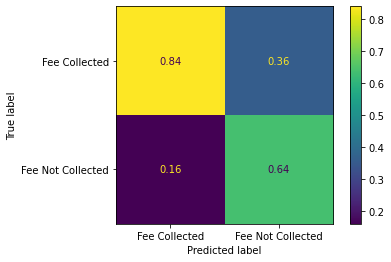

In [102]:
plot_confusion_matrix(rf_pipe, x_train, y_train, 
                      display_labels= ['Fee Collected', 'Fee Not Collected'], normalize="pred");

In [105]:
testing = pd.DataFrame(rf_pipe.steps[1][1].feature_importances_)

In [106]:
testing.sort_values(by = 0, ascending = False)

,0
17,8.159989e-02
0,5.676928e-02
50,5.621811e-02
38,5.077795e-02
77,4.416571e-02
...,...
122,6.426904e-07
128,6.078714e-07
125,1.696209e-07
130,7.058934e-08


In [43]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213243 entries, 0 to 213242
Data columns (total 81 columns):
 #   Column                                                     Non-Null Count   Dtype  
---  ------                                                     --------------   -----  
 0   Estimate!!Nonfamily households!!Median income (dollars)    213243 non-null  float64
 1   Estimate!!Nonfamily households!!Mean income (dollars)      213243 non-null  float64
 2   Estimate!!Nonfamily households!!Total!!Less than $10,000   213243 non-null  float64
 3   Estimate!!Nonfamily households!!Total!!$10,000 to $14,999  213243 non-null  float64
 4   Estimate!!Nonfamily households!!Total!!$15,000 to $24,999  213243 non-null  float64
 5   Estimate!!Nonfamily households!!Total!!$25,000 to $34,999  213243 non-null  float64
 6   Estimate!!Nonfamily households!!Total!!$35,000 to $49,999  213243 non-null  float64
 7   Estimate!!Nonfamily households!!Total!!$50,000 to $74,999  213243 non-null  float64

In [ ]:
Estimate!!Nonfamily households!!Total!!$15,000 to $24,999

In [349]:
x_train.iloc[:,17]

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
213238    0.0
213239    0.0
213240    0.0
213241    0.0
213242    0.0
Name: x0_NYPD TRANSPORT INTELLIGENCE DI, Length: 213243, dtype: float64

In [24]:
model_RF = RandomForestClassifier()
model_RF.fit(x_train, y_train)
y_hat = model_RF.predict(y_train)

acc = accuracy_score(y_train,y_hat)
macro_precision_score=precision_score(y_train, y_hat, average='macro')
micro_precision_score=precision_score(y_train, y_hat, average='micro')
macro_recall_score=recall_score(y_train, y_hat, average='macro')
micro_recall_score=recall_score(y_train, y_hat, average='micro')

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

# XGBoost

In [44]:
xgb_pipe = Pipeline(steps=[
    ('ss', StandardScaler()),
    ('rf', XGBClassifier())
])
xgb_pipe.fit(x_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:40:28] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('ss', StandardScaler()),
                ('rf',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [45]:
print_cv_scores(xgb_pipe, x_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:41:04] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:41:49] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:42:40] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:43:31] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:44:27] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.71746955 0.72338418 0.71545306 0.70980978 0.71010874]
Training Accuracy 0.7152450614693125
##############
[0.66601796 0.6413515  0.65150414 0.63686457 0.67034796]
Cross_Val Accuracy 0.6532172253160942
##############
Training Macro Precision: 0.7040610386171222
Cross_Val Macro Precision: 0.6422411184001837
##############
Training Macro Recall: 0.686343636423462
Cross_Val Macro Recall: 0.625461979403772
##############
Training Macro F1: 0.6906508973396228
Cross_Val Macro F1: 0.6208919635626482


In [353]:
display_labels = ['Written Off', 
                  'Defaulted', 
                  'Dismissed',
                  'In Violation']

def print_cm_with_labels(y_true, 
                         y_pred, 
                         display_labels):
    
    
    '''
    Takes the true values and predicted values of a classifier and 
    plots a confusion matrix (normalized by predictions) using 
    a list of given display labels.
    '''
    cm = confusion_matrix(y_true, y_pred, normalize = 'pred')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=display_labels)

    fig, ax = plt.subplots(figsize=(6,6))
    disp.plot(ax=ax)
    ax.grid(False)
    disp.ax_.set_xticklabels(display_labels,rotation=45);

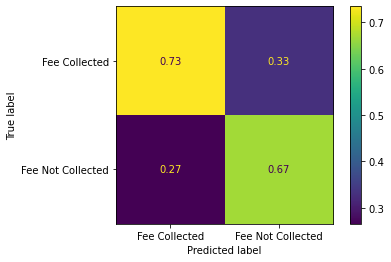

In [46]:
plot_confusion_matrix(xgb_pipe, x_train, y_train, 
                      display_labels= ['Fee Collected', 'Fee Not Collected'], normalize="pred");

In [357]:
xgb_pipe[1]

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

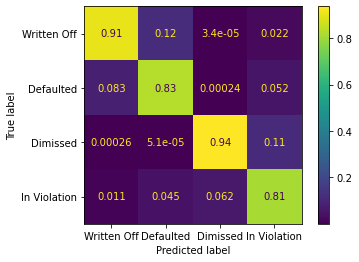

In [360]:
plot_confusion_matrix(xgb_pipe, x_train, y_train, 
                      display_labels= ['Written Off', 'Defaulted','Dimissed','In Violation'],
                      normalize ="pred") 

In [ ]:
display_labels = ['Written Off', 
                  'Defaulted', 
                  'Dismissed',
                  'In Violation']

def print_cm_with_labels(y_true, 
                         y_pred, 
                         display_labels):
    
    
    '''
    Takes the true values and predicted values of a classifier and 
    plots a confusion matrix (normalized by predictions) using 
    a list of given display labels.
    '''
    

In [324]:
cm = confusion_matrix(x_train, 
                      y_train, 
                      normalize = 'pred')

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

fig, ax = plt.subplots(figsize=(6,6))
disp.plot(ax=ax)
ax.grid(False)
disp.ax_.set_xticklabels(display_labels,rotation=45);

ValueError: Classification metrics can't handle a mix of continuous-multioutput and multiclass targets

In [ ]:
boost_model = XGBClassifier(objective='ternary:logistic',
    max_depth = 20,
    min_child_weight = 0.5,
    reg_alpha = 0)


boost_model.fit(train_df, merged_train_df["Hearing Result"])
# print("fit model")
    
y_hat = boost_model.predict(merged_train_df["Hearing Result"])
# print("predicted on model")